In [153]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [154]:
df=pd.read_csv('file:///F:/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [155]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [156]:
df.shape

(10000, 3)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [158]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [159]:
df.corr().describe()

,Height,Weight
count,2.000000,2.000000
mean,0.962378,0.962378
std,0.053205,0.053205
min,0.924756,0.924756
25%,0.943567,0.943567
50%,0.962378,0.962378
75%,0.981189,0.981189
max,1.000000,1.000000


In [160]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [161]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Height     66.367560
Weight    161.440357
dtype: float64

In [162]:
df.min()

Gender       Female
Height    54.263133
Weight    64.700127
dtype: object

In [163]:
df.max()

Gender          Male
Height     78.998742
Weight    269.989699
dtype: object

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
la=LabelEncoder()

In [166]:
df['Gender']=la.fit_transform(df['Gender'])

In [167]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [168]:
from PIL import Image

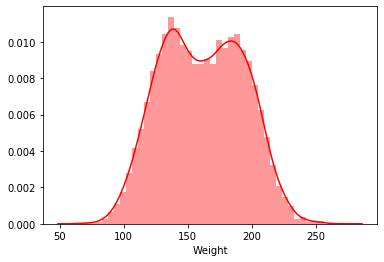

In [169]:
sns.distplot(df['Weight'],color='red')

In [170]:
mean_value_weight=df['Weight'].mean()
mean_value_weight

161.44035683283076

In [171]:
mean_value_Height=df['Height'].mean()
mean_value_Height

66.36755975482106

In [172]:
std_value_weight=df['Weight'].std()
std_value_weight

32.108439006519546

In [173]:
std_value_height=df['Height'].std()
std_value_height

3.8475281207732324

In [174]:
std_3_weight=mean_value_weight+(3*std_value_weight)
std_3_weight

257.7656738523894

In [175]:
std_3_weight2=mean_value_weight-(3*std_3_weight)
std_3_weight2

-611.8566647243374

In [176]:
std_3_height=mean_value_weight+(3*std_value_height)
std_3_height

172.98294119515046

In [177]:
std_3_height2=mean_value_Height-(3*std_3_height)
std_3_height2

-452.5812638306303

In [178]:
df[df['Weight']>std_3_weight]

,Gender,Height,Weight
2014,1,78.998742,269.989699


In [179]:
df[df['Weight']<std_3_weight]

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [180]:
df[df['Height']>std_3_height]

,Gender,Height,Weight


In [181]:
df[df['Height']<std_3_height]

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [182]:
marge1=df[(df['Weight']>std_3_weight) | (df['Weight']<std_3_weight)]

In [183]:
marge2=df[(df['Height']>std_3_height)| (df['Height']<std_3_height)]

In [184]:
remove_marge1=df[(df['Weight']>std_3_weight) & (df['Weight']<std_3_weight)]

In [185]:
remove_marge2=df[(df['Height']>std_3_height)| (df['Height']<std_3_height)]

In [186]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [187]:
x=df.drop(['Height'],axis='columns')

In [188]:
y=df.Height.values

In [189]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [191]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
li.score(xtest,ytest)*100

86.25474859410481

In [195]:
li.predict(xtest)

array([68.29999065, 70.02580832, 66.95046961, ..., 68.36300193,
       64.01773062, 69.64496365])

In [196]:
from sklearn.metrics import mean_squared_error,r2_score

In [197]:
pred=li.predict(xtest)

In [198]:
mean_squared_error(ytest,pred)

2.0380864148286113

In [199]:
r2_score(ytest,pred)

0.8625474859410482

In [213]:
from sklearn.neighbors import KNeighborsRegressor

In [214]:
knn=KNeighborsRegressor(n_neighbors=100)

In [215]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='uniform')

In [218]:
knn.score(xtest,ytest)*100

85.97651075360307

In [220]:
pred2=knn.predict(xtest)
pred2

array([67.4491368 , 69.99309539, 67.17092259, ..., 68.33650837,
       64.00592747, 69.38385389])

In [221]:
mean_squared_error(ytest,pred2)

2.079342318127307

In [222]:
r2_score(ytest,pred2)

0.8597651075360307

In [223]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [224]:
from catboost import CatBoostRegressor

In [225]:
cat=CatBoostRegressor()
cat.fit(xtrain,ytrain)
pred_cat=cat.predict(xtest)
accu_cat=accuracy_score(ytest,pred_cat)*100
accu_cat

Learning rate set to 0.055186
0:	learn: 3.6763476	total: 300ms	remaining: 5m
1:	learn: 3.5199206	total: 308ms	remaining: 2m 33s
2:	learn: 3.3704461	total: 316ms	remaining: 1m 44s
3:	learn: 3.2349136	total: 323ms	remaining: 1m 20s
4:	learn: 3.1053613	total: 329ms	remaining: 1m 5s
5:	learn: 2.9858238	total: 334ms	remaining: 55.3s
6:	learn: 2.8725893	total: 338ms	remaining: 47.9s
7:	learn: 2.7650938	total: 341ms	remaining: 42.3s
8:	learn: 2.6634421	total: 347ms	remaining: 38.2s
9:	learn: 2.5694502	total: 350ms	remaining: 34.7s
10:	learn: 2.4804052	total: 354ms	remaining: 31.8s
11:	learn: 2.4004059	total: 357ms	remaining: 29.4s
12:	learn: 2.3242748	total: 360ms	remaining: 27.4s
13:	learn: 2.2593282	total: 363ms	remaining: 25.6s
14:	learn: 2.1952544	total: 366ms	remaining: 24.1s
15:	learn: 2.1352648	total: 370ms	remaining: 22.7s
16:	learn: 2.0791258	total: 373ms	remaining: 21.6s
17:	learn: 2.0292705	total: 377ms	remaining: 20.5s
18:	learn: 1.9817907	total: 380ms	remaining: 19.6s
19:	learn: 

208:	learn: 1.4317099	total: 972ms	remaining: 3.68s
209:	learn: 1.4316094	total: 976ms	remaining: 3.67s
210:	learn: 1.4314922	total: 979ms	remaining: 3.66s
211:	learn: 1.4313607	total: 982ms	remaining: 3.65s
212:	learn: 1.4313063	total: 986ms	remaining: 3.64s
213:	learn: 1.4312601	total: 989ms	remaining: 3.63s
214:	learn: 1.4311924	total: 992ms	remaining: 3.62s
215:	learn: 1.4311405	total: 996ms	remaining: 3.61s
216:	learn: 1.4310848	total: 1000ms	remaining: 3.61s
217:	learn: 1.4309725	total: 1s	remaining: 3.6s
218:	learn: 1.4308979	total: 1.01s	remaining: 3.6s
219:	learn: 1.4308522	total: 1.01s	remaining: 3.59s
220:	learn: 1.4307766	total: 1.01s	remaining: 3.58s
221:	learn: 1.4307064	total: 1.02s	remaining: 3.57s
222:	learn: 1.4306573	total: 1.02s	remaining: 3.56s
223:	learn: 1.4305702	total: 1.02s	remaining: 3.55s
224:	learn: 1.4304043	total: 1.03s	remaining: 3.54s
225:	learn: 1.4303839	total: 1.03s	remaining: 3.53s
226:	learn: 1.4303465	total: 1.03s	remaining: 3.52s
227:	learn: 1.43

385:	learn: 1.4218922	total: 1.63s	remaining: 2.6s
386:	learn: 1.4218756	total: 1.64s	remaining: 2.59s
387:	learn: 1.4217858	total: 1.64s	remaining: 2.59s
388:	learn: 1.4217714	total: 1.64s	remaining: 2.58s
389:	learn: 1.4217665	total: 1.65s	remaining: 2.58s
390:	learn: 1.4216870	total: 1.65s	remaining: 2.57s
391:	learn: 1.4216287	total: 1.65s	remaining: 2.57s
392:	learn: 1.4216141	total: 1.66s	remaining: 2.56s
393:	learn: 1.4215920	total: 1.66s	remaining: 2.56s
394:	learn: 1.4215133	total: 1.67s	remaining: 2.55s
395:	learn: 1.4214919	total: 1.67s	remaining: 2.55s
396:	learn: 1.4214297	total: 1.68s	remaining: 2.55s
397:	learn: 1.4214041	total: 1.68s	remaining: 2.54s
398:	learn: 1.4213641	total: 1.68s	remaining: 2.54s
399:	learn: 1.4213234	total: 1.69s	remaining: 2.53s
400:	learn: 1.4213076	total: 1.69s	remaining: 2.53s
401:	learn: 1.4212421	total: 1.7s	remaining: 2.52s
402:	learn: 1.4212109	total: 1.7s	remaining: 2.52s
403:	learn: 1.4211920	total: 1.71s	remaining: 2.52s
404:	learn: 1.4

581:	learn: 1.4156598	total: 2.31s	remaining: 1.66s
582:	learn: 1.4156422	total: 2.31s	remaining: 1.65s
583:	learn: 1.4156145	total: 2.31s	remaining: 1.65s
584:	learn: 1.4155977	total: 2.32s	remaining: 1.64s
585:	learn: 1.4155555	total: 2.32s	remaining: 1.64s
586:	learn: 1.4155000	total: 2.32s	remaining: 1.64s
587:	learn: 1.4154958	total: 2.33s	remaining: 1.63s
588:	learn: 1.4154542	total: 2.33s	remaining: 1.63s
589:	learn: 1.4154386	total: 2.33s	remaining: 1.62s
590:	learn: 1.4154056	total: 2.34s	remaining: 1.62s
591:	learn: 1.4153892	total: 2.34s	remaining: 1.61s
592:	learn: 1.4153841	total: 2.34s	remaining: 1.61s
593:	learn: 1.4153714	total: 2.35s	remaining: 1.6s
594:	learn: 1.4153617	total: 2.35s	remaining: 1.6s
595:	learn: 1.4153418	total: 2.35s	remaining: 1.6s
596:	learn: 1.4153378	total: 2.36s	remaining: 1.59s
597:	learn: 1.4153163	total: 2.36s	remaining: 1.59s
598:	learn: 1.4152792	total: 2.37s	remaining: 1.58s
599:	learn: 1.4152458	total: 2.37s	remaining: 1.58s
600:	learn: 1.4

762:	learn: 1.4122600	total: 2.99s	remaining: 929ms
763:	learn: 1.4122322	total: 2.99s	remaining: 925ms
764:	learn: 1.4121954	total: 3s	remaining: 921ms
765:	learn: 1.4121928	total: 3s	remaining: 917ms
766:	learn: 1.4121713	total: 3.01s	remaining: 914ms
767:	learn: 1.4121447	total: 3.01s	remaining: 909ms
768:	learn: 1.4121399	total: 3.02s	remaining: 906ms
769:	learn: 1.4121101	total: 3.02s	remaining: 902ms
770:	learn: 1.4121068	total: 3.02s	remaining: 899ms
771:	learn: 1.4120883	total: 3.03s	remaining: 896ms
772:	learn: 1.4120653	total: 3.04s	remaining: 893ms
773:	learn: 1.4120438	total: 3.05s	remaining: 890ms
774:	learn: 1.4120322	total: 3.05s	remaining: 886ms
775:	learn: 1.4120181	total: 3.06s	remaining: 884ms
776:	learn: 1.4120130	total: 3.06s	remaining: 880ms
777:	learn: 1.4119941	total: 3.07s	remaining: 876ms
778:	learn: 1.4119928	total: 3.08s	remaining: 873ms
779:	learn: 1.4119826	total: 3.08s	remaining: 869ms
780:	learn: 1.4119621	total: 3.09s	remaining: 865ms
781:	learn: 1.4119

956:	learn: 1.4098963	total: 3.82s	remaining: 172ms
957:	learn: 1.4098743	total: 3.82s	remaining: 168ms
958:	learn: 1.4098725	total: 3.83s	remaining: 164ms
959:	learn: 1.4098672	total: 3.83s	remaining: 160ms
960:	learn: 1.4098606	total: 3.83s	remaining: 156ms
961:	learn: 1.4098371	total: 3.83s	remaining: 152ms
962:	learn: 1.4098284	total: 3.84s	remaining: 147ms
963:	learn: 1.4098010	total: 3.84s	remaining: 144ms
964:	learn: 1.4098002	total: 3.85s	remaining: 140ms
965:	learn: 1.4097831	total: 3.85s	remaining: 136ms
966:	learn: 1.4097646	total: 3.85s	remaining: 131ms
967:	learn: 1.4097502	total: 3.86s	remaining: 127ms
968:	learn: 1.4097478	total: 3.86s	remaining: 123ms
969:	learn: 1.4097239	total: 3.86s	remaining: 119ms
970:	learn: 1.4097083	total: 3.87s	remaining: 115ms
971:	learn: 1.4096855	total: 3.87s	remaining: 111ms
972:	learn: 1.4096754	total: 3.87s	remaining: 108ms
973:	learn: 1.4096670	total: 3.88s	remaining: 104ms
974:	learn: 1.4096441	total: 3.88s	remaining: 99.5ms
975:	learn:

ValueError: continuous is not supported

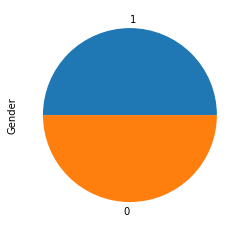

In [226]:
df.Gender.value_counts().plot(kind='pie')

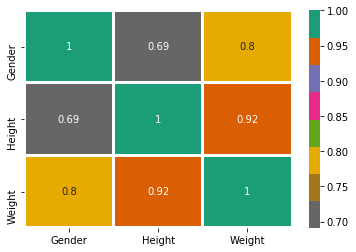

In [228]:

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

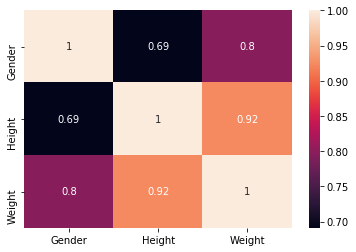

In [229]:
sns.heatmap(df.corr(),annot=True)

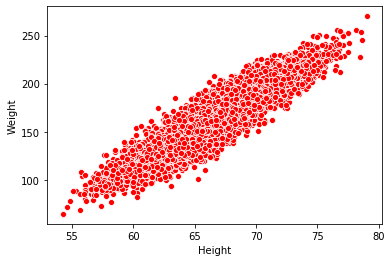

In [230]:
sns.scatterplot(x='Height',y='Weight',data=df,color='red')

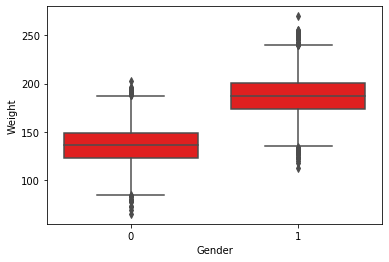

In [231]:
sns.boxplot(x='Gender',y='Weight',data=df,color='red')

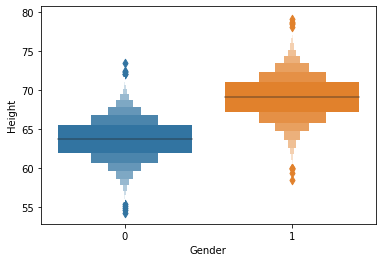

In [235]:
sns.boxenplot(x='Gender',y='Height',data=df)

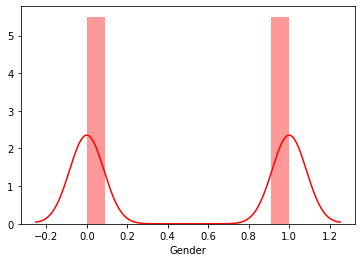

In [240]:
sns.distplot(df['Gender'],color='red')

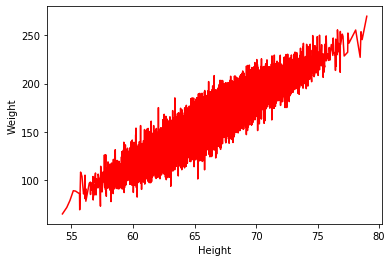

In [241]:
sns.lineplot(x='Height', y='Weight',data=df,color="red")

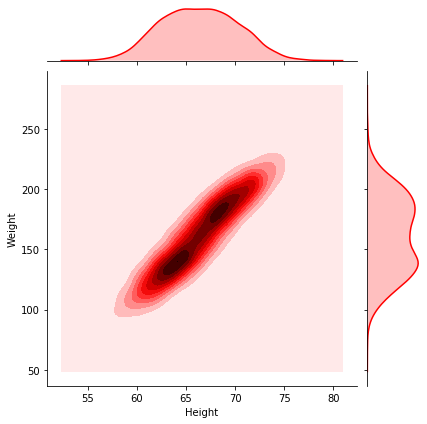

In [244]:
sns.jointplot(x='Height', y='Weight',data=df,color="red",kind='kde')

In [245]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

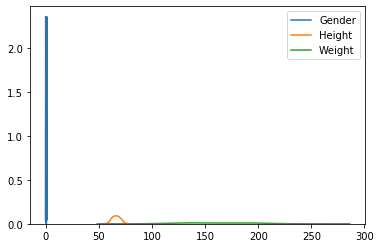

In [246]:
sns.kdeplot(df['Gender'])
sns.kdeplot(df['Height'])
sns.kdeplot(df['Weight'])

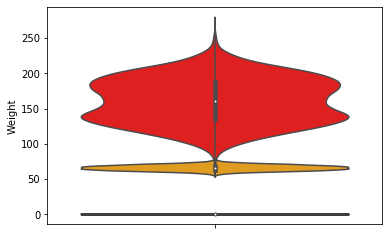

In [247]:
sns.violinplot(y="Gender",data=df)
sns.violinplot(y="Height",data=df,color='orange')
sns.violinplot(y="Weight",data=df,color='red')

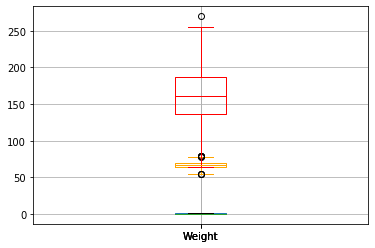

In [248]:
df.boxplot(column="Gender")
df.boxplot(column="Height",color='orange')
df.boxplot(column="Weight",color='red')

In [249]:
import sweetviz as sv

In [250]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [251]:
from IPython.display import IFrame

In [252]:
IFrame(src='Analyze.html',width=1000,height=600)

In [253]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [254]:
man=MinMaxScaler()
feat=['Gender', 'Height', 'Weight']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Gender,Height,Weight
0,1.0,0.791728,0.863139
1,1.0,0.586958,0.475476
2,1.0,0.802364,0.721131
3,1.0,0.706182,0.756699
4,1.0,0.631424,0.689999
...,...,...,...
9995,0.0,0.481473,0.351101
9996,0.0,0.517635,0.517161
9997,0.0,0.388301,0.310660
9998,0.0,0.597160,0.482988


In [255]:
std=StandardScaler()
feat=['Gender', 'Height', 'Weight']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Gender,Height,Weight
0,1.0,1.944061,2.505797
1,1.0,0.627537,0.027101
2,1.0,2.012443,1.597806
3,1.0,1.394060,1.825222
4,1.0,0.913421,1.398750
...,...,...,...
9995,-1.0,-0.050660,-0.768151
9996,-1.0,0.181839,0.293631
9997,-1.0,-0.649688,-1.026730
9998,-1.0,0.693125,0.075127
